In [54]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

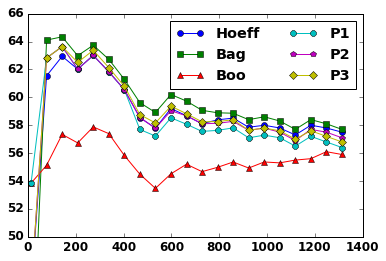

In [58]:
files = ['results-abalone_v2-hoeff.csv', 
         'results-abalone_v2-bagging-hoeff.csv', 
         'results-abalone_v2-boosting-hoeff.csv', 
         'results-abalone_v2-pame1-hoeff.csv', 
         'results-abalone_v2-pame2-hoeff.csv', 
         'results-abalone_v2-pame3-hoeff.csv']
n = len(files)
F = 'classifications correct (percent)'
T = 'learning evaluation instances'
mrk = ['o', 's', '^', '8', 'p', 'D']
ln = []
lims = []

for i in range(n):
    df = pd.read_csv(files[i])
    t = range(0, len(df[T]), 5)
    plt.plot(df[T][t], df[F][t], marker=mrk[i])
    
plt.ylim(50,66)
plt.legend(["Hoeff", "Bag", "Boo", "P1", "P2", "P3"], ncol=2)

font = {'size'   : 12}
plt.rc('font', **font)


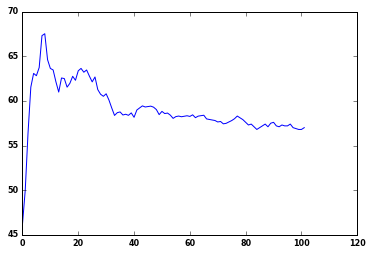

In [53]:
plt.plot(df['classifications correct (percent)'])

In [17]:
print i, n, files[i], len(df['classifications correct (percent)'])

5 6 results-abalone_v2-pame3-hoeff.csv 102


In [35]:
df[F]
range(0, 100, 5)

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]